# Лабораторная работа 2 (9.8). Сэмплинг

## Загрузка модулей

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('../datasets/gender_classification.csv')
df = df.sample(1233)

In [40]:
df['gender'] = np.where(df['gender'] == "Male", 1, 0)
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2431,1,14.2,5.5,1,1,0,1,1
456,0,12.8,6.3,1,1,1,1,1
3451,0,12.3,6.1,0,0,0,0,0
3360,1,12.9,5.3,1,1,1,1,1
2782,1,13.0,5.6,1,1,1,1,1
...,...,...,...,...,...,...,...,...
4995,1,12.3,6.9,0,1,1,1,1
2163,1,11.9,5.1,1,0,0,0,0
4466,1,11.8,6.9,1,1,1,1,1
4642,1,13.9,6.0,0,0,0,0,0


## Простой случайный сэмплинг

In [41]:
X = df[['forehead_width_cm', 'nose_wide']]
y = df['gender']
X, y

(      forehead_width_cm  nose_wide
 2431               14.2          1
 456                12.8          1
 3451               12.3          0
 3360               12.9          1
 2782               13.0          1
 ...                 ...        ...
 4995               12.3          0
 2163               11.9          1
 4466               11.8          1
 4642               13.9          0
 4092               13.4          0
 
 [1233 rows x 2 columns],
 2431    1
 456     1
 3451    0
 3360    1
 2782    1
        ..
 4995    1
 2163    0
 4466    1
 4642    0
 4092    0
 Name: gender, Length: 1233, dtype: int32)

In [42]:
df.sample(100)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
3806,1,11.5,7.0,1,1,1,1,1
896,1,14.6,5.3,0,0,1,1,1
1373,1,12.8,6.9,1,1,1,1,1
1131,1,13.6,5.1,1,0,1,1,1
3492,1,14.0,5.5,1,0,0,1,0
...,...,...,...,...,...,...,...,...
693,1,12.4,6.6,1,0,1,1,1
2195,1,12.3,6.0,0,1,0,0,0
1945,1,12.8,6.4,0,0,0,0,0
3323,1,13.1,6.0,0,0,1,0,0


## Стратифицированный сэмплинг

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
X_train

,forehead_width_cm,nose_wide
206,14.3,1
4648,14.3,0
3783,12.6,1
2902,12.0,0
3723,12.9,0
...,...,...
2498,13.6,0
1849,15.0,1
3145,13.6,0
2699,13.9,1


## Андерсэмплинг

Class 0: 590
Class 1: 643
Пропорция: 0.92 : 1


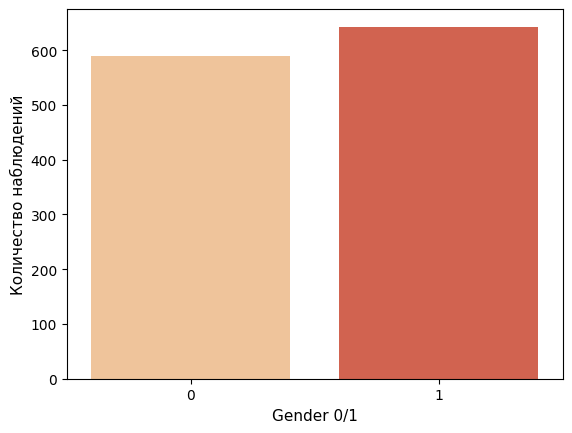

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Проверка баланса выходной переменной
target_count = df['gender'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x='gender', data=df, palette="OrRd")
plt.box(True)
plt.xlabel('Gender 0/1',fontsize=11)
plt.ylabel('Количество наблюдений', fontsize=11)
plt.show()

Class 0: 590
Class 1: 590
Пропорция: 1.0 : 1


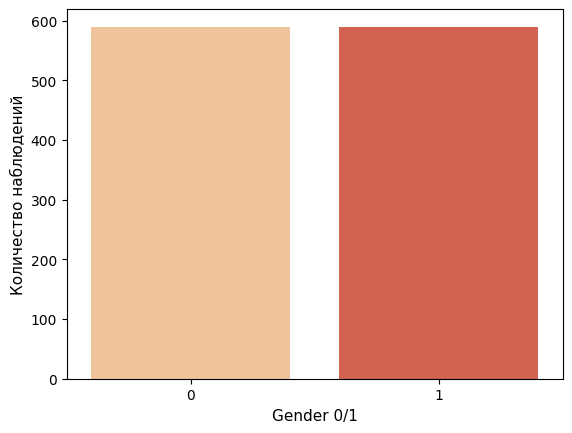

In [47]:
shuffled_df = df.sample(frac=1,random_state=4)
CHD_df = shuffled_df.loc[shuffled_df['gender'] == 1].sample(n=590,random_state=1)
non_CHD_df = shuffled_df.loc[shuffled_df['gender'] == 0]
normalized_df = pd.concat([CHD_df, non_CHD_df])

target_count = normalized_df['gender'].value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Пропорция:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(x = 'gender', data = normalized_df, palette="OrRd")
plt.box(True)
plt.xlabel('Gender 0/1',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

(1233, 2)
(1233, 2)
(1233, 3)
1    643
0    590
Name: gender, dtype: int64


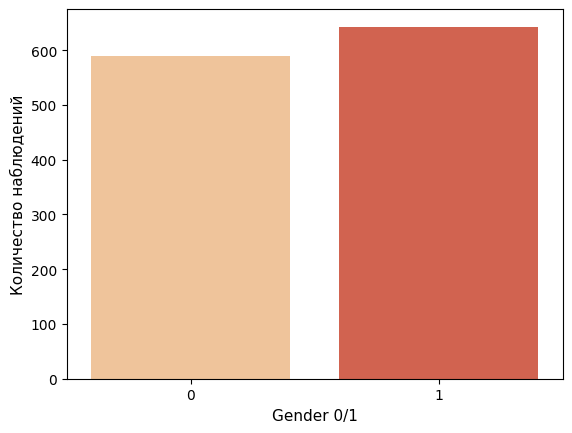

In [50]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_res, y_res = tl.fit_resample(X, y)
print(X_res.shape)
print(X.shape)
df_new=pd.concat([X_res, y_res], axis=1)
print(df_new.shape)
print(df_new['gender'].value_counts())
sns.countplot(x = 'gender', data = df_new, palette="OrRd")
plt.box(True)
plt.xlabel('Gender 0/1',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

## Оверсэмплинг

(1286, 2)
(1233, 2)
1    643
0    643
Name: gender, dtype: int64


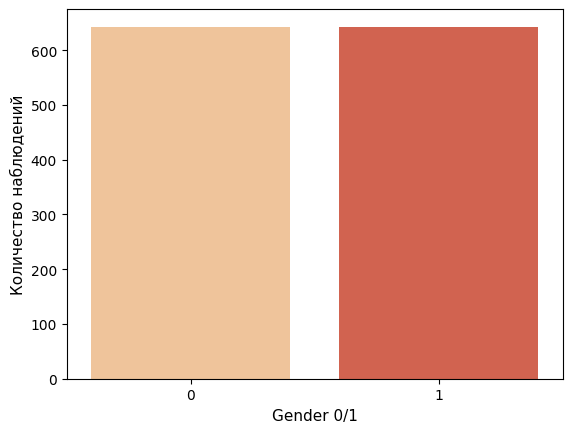

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
print(y_sm.value_counts())
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape

sns.countplot(x = 'gender', data = df_new_sm, palette="OrRd")
plt.box(True)
plt.xlabel('Gender 0/1',fontsize=11)
plt.ylabel('Количество наблюдений',fontsize=11)
plt.show()

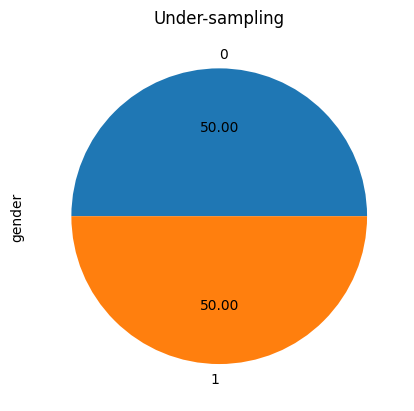

In [52]:
from imblearn.under_sampling import RandomUnderSampler

sampling_strategy = 0.9999
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
autopct = "%.2f"
ax = y_res.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Under-sampling")

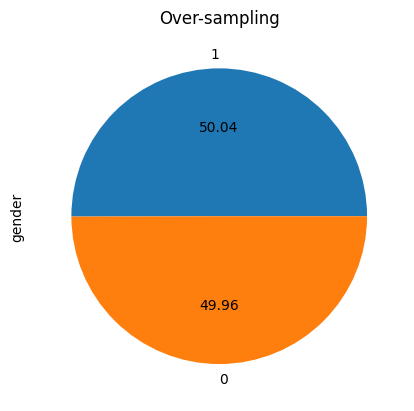

In [53]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
ax = y_s.value_counts().plot.pie(autopct=autopct)
_ = ax.set_title("Over-sampling")

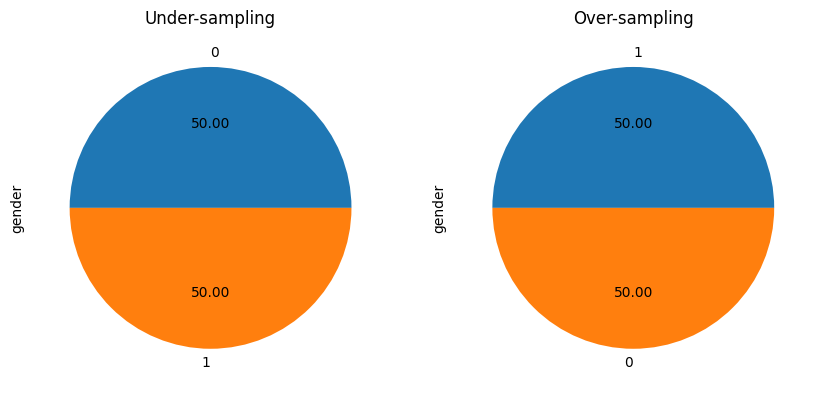

In [54]:
sampling_strategy = "not minority"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
X_res, y_res = rus.fit_resample(X, y)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Under-sampling")

sampling_strategy = "not majority"
ros = RandomOverSampler(sampling_strategy=sampling_strategy)
X_s, y_s = ros.fit_resample(X, y)
y_s.value_counts().plot.pie(autopct=autopct, ax=axs[1])
_ = axs[1].set_title("Over-sampling")